# Keplerian Q-law: LEO transfer

In this example, we make use of Keplerian elements to construct the transfer.

In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import time 

import sys
sys.path.append("../../../")    # path to pyqlaw
import pyqlaw

We define the canonical scales, initial and final Keplerian elements, and spacecraft parameters. It is important for numerical stability to make sure that the initial and final elements are different in all components. 

In [2]:
# initial and final elements: [a,e,i,RAAN,omega,ta]
LU = 6378
GM_EARTH = 398600.44
VU = np.sqrt(GM_EARTH/LU)
TU = LU/VU

KEP0 = [10500/LU + 1e-6, 0.05, np.deg2rad(62) + 1e-6, np.deg2rad(100), 1e-2, 1e-2]
KEPF = [10500/LU, 1e-2, np.deg2rad(62), np.deg2rad(200), 1e-3, 0]
oe0 = np.array(KEP0)
oeT = np.array(KEPF)
print(f"oe0: {oe0}")
print(f"oeT: {oeT}")

# spacecraft parameters
MU = 1000        # spacecraft wet mass, kg
tmax_si = 1.45   # spacecraft thrust, Newton
isp_si  = 1500   # spacecraft specific impulse, seconds
mdot_si = tmax_si/(isp_si*9.81)  # kg/s

# non-dimensional quantities
mass0 = 1.0
tmax = tmax_si * (1/MU)*(TU**2/(1e3*LU))
mdot = np.abs(mdot_si) *(TU/MU)
tmax, mdot

oe0: [1.6462851  0.05       1.08210514 1.74532925 0.01       0.01      ]
oeT: [1.64628410e+00 1.00000000e-02 1.08210414e+00 3.49065850e+00
 1.00000000e-03 0.00000000e+00]


(0.00014797871723372909, 7.949972406630535e-05)

In [3]:
oe0 = np.array(KEP0)
oeT = np.array(KEPF)
oe0, oeT

(array([1.6462851 , 0.05      , 1.08210514, 1.74532925, 0.01      ,
        0.01      ]),
 array([1.64628410e+00, 1.00000000e-02, 1.08210414e+00, 3.49065850e+00,
        1.00000000e-03, 0.00000000e+00]))

We can now initialize and setup the problem

In [4]:
tol_oe = [1e-3, 1e-3, 1e-3, 1e-2, 1e-2]
prob = pyqlaw.QLaw(
    integrator="rk4", 
    elements_type="keplerian",
    verbosity=2,
    print_frequency=2000,
    use_sundman=True,
    perturbations=None,
    tol_oe = tol_oe,
)

In [5]:
# setup problem
tf_max = 365.25 * 86400 / TU       # max time, in canonical scales
t_step = np.deg2rad(5)             # integration step, in angles
woe = [1.0, 1.0, 1.0, 1.0, 1.0]
prob.set_problem(
    oe0, oeT, mass0, tmax, mdot, tf_max, t_step,
    woe = woe)
prob.pretty()

Transfer:
  a  : 1.6463e+00 -> 1.6463e+00 (weight: 1.00)
  e  : 5.0000e-02 -> 1.0000e-02 (weight: 1.00)
  i  : 1.0821e+00 -> 1.0821e+00 (weight: 1.00)
  raan  : 1.7453e+00 -> 3.4907e+00 (weight: 1.00)
  omega  : 1.0000e-02 -> 1.0000e-03 (weight: 1.00)


In [6]:
# solve
prob.solve()
prob.pretty_results()


 iter   |  time      |  del1       |  del2       |  del3       |  del4       |  del5       |  el6        |
      0 |  1.751e-01 |  8.1159e-05 |  4.0046e-02 | -9.0498e-06 | -1.7453e+00 |  9.4363e-03 |  1.0070e-01 |
   2000 |  3.826e+02 |  8.1641e-02 |  9.8095e-02 | -1.2295e-02 | -1.7291e+00 |  1.0896e+00 |  1.7323e+02 |
   4000 |  7.950e+02 |  1.8384e-01 |  1.9814e-01 | -2.6100e-02 | -1.7065e+00 |  1.3200e+00 |  3.4740e+02 |
   6000 |  1.250e+03 |  3.2013e-01 |  3.1195e-01 | -4.0935e-02 | -1.6700e+00 |  1.3866e+00 |  5.2090e+02 |
   8000 |  1.769e+03 |  5.5876e-01 |  4.2612e-01 | -5.3538e-02 | -1.6004e+00 |  1.3918e+00 |  6.9419e+02 |
  10000 |  2.436e+03 |  1.1474e+00 |  4.9473e-01 | -5.5101e-02 | -1.4491e+00 |  1.3373e+00 |  8.6757e+02 |
  12000 |  3.751e+03 |  4.4056e+00 |  4.5786e-01 | -2.7844e-02 | -1.0308e+00 |  1.2033e+00 |  1.0407e+03 |
  14000 |  6.408e+03 |  1.3742e+00 |  1.9171e-01 | -1.3023e-05 |  1.6140e-04 |  1.1881e-02 |  1.2165e+03 |
  16000 |  7.014e+03 |  1.9518e-01 |

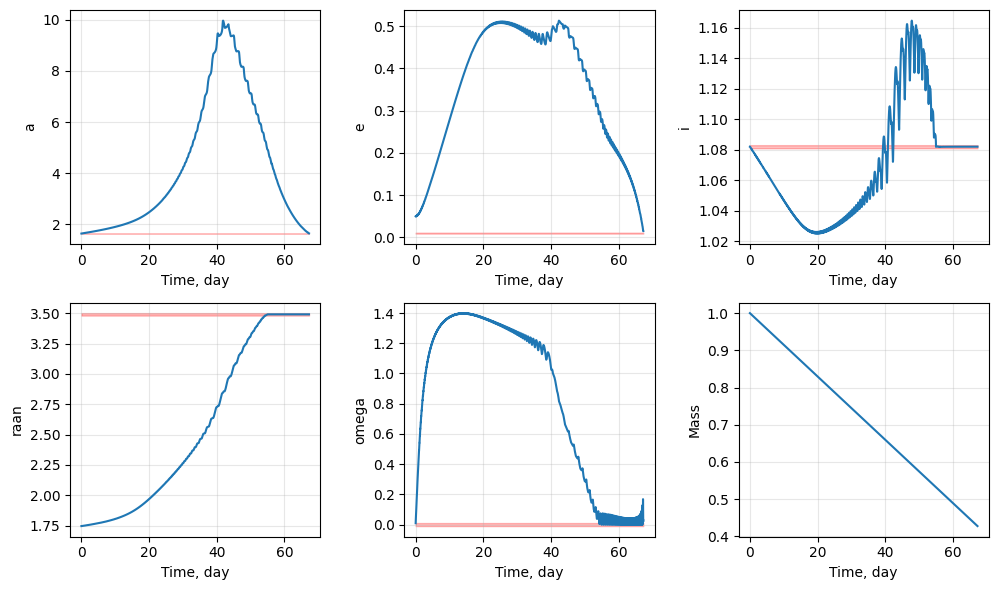

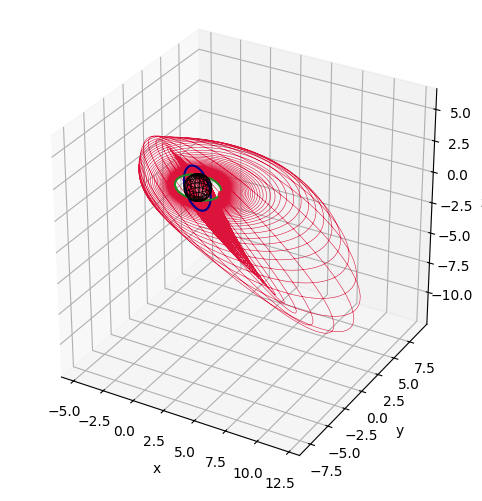

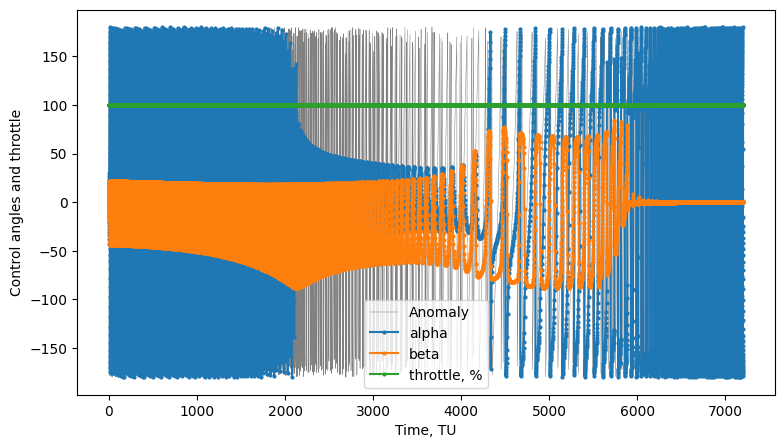

In [7]:
# plots
fig1, ax1 = prob.plot_elements_history(to_keplerian=True, TU=TU/86400, time_unit_name="day")
fig2, ax2 = prob.plot_trajectory_3d(interpolate=False, sphere_radius=6378/LU)
fig3, ax3 = prob.plot_controls()
plt.show()